In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
# Load the data
df = pd.read_csv("../data/Customers3.csv")
df

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


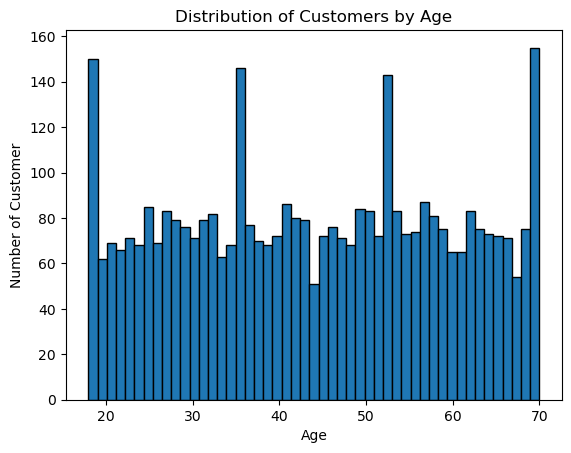

In [3]:
# Plotting the overall distribution of customer ages in the dataset
plt.hist(df['Age'],bins=49, edgecolor='k',)
plt.title("Distribution of Customers by Age")
plt.ylabel("Number of Customer")
plt.xlabel("Age")
plt.show()

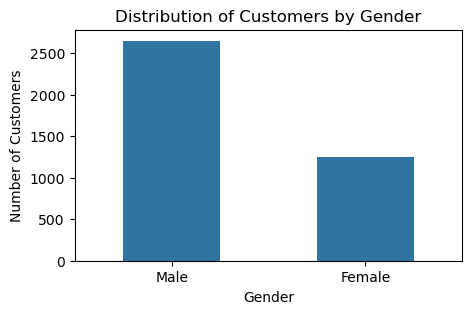

In [4]:
# Plotting the gender distribution of customers in the dataset
plt.figure(figsize=(5,3))
sns.countplot(x='Gender',data=df, width=0.5)
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

Text(0.5, 1.0, 'Item Purchased')

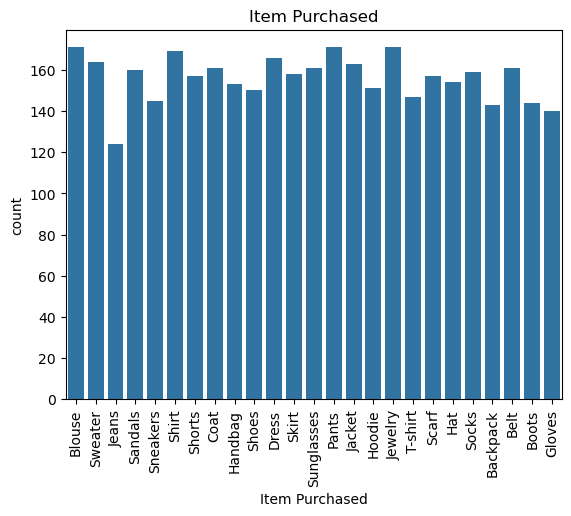

In [5]:
# Plotting the distribution of items purchased
sns.countplot(x='Item Purchased',data=df)
plt.xticks(rotation=90)
plt.title('Item Purchased')

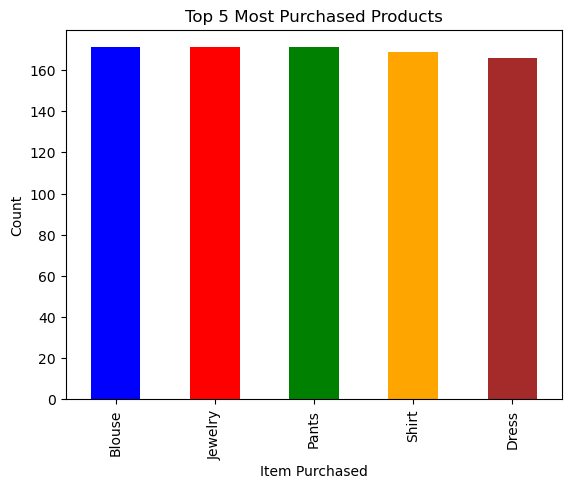

In [6]:
# Narrowing it down to only plot the top 5 most purchased products
most_purchased = df['Item Purchased'].value_counts().sort_values(ascending=False)
most_purchased.head().plot(kind='bar', color=('blue', 'red', 'green', 'orange', 'brown'))
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.show()

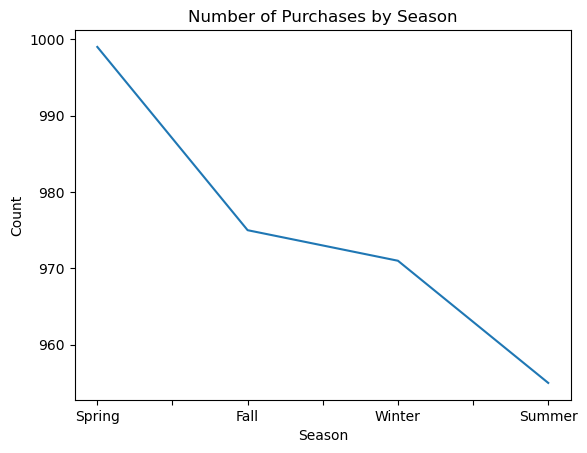

In [7]:
# Plotting Purchases by Season
df['Season'].value_counts().plot()
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number of Purchases by Season')
plt.show()

In [8]:
# Plotting top 10 locations where customers are spending
top_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)
top_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(top_locations.head(10), x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

<Figure size 1800x800 with 0 Axes>

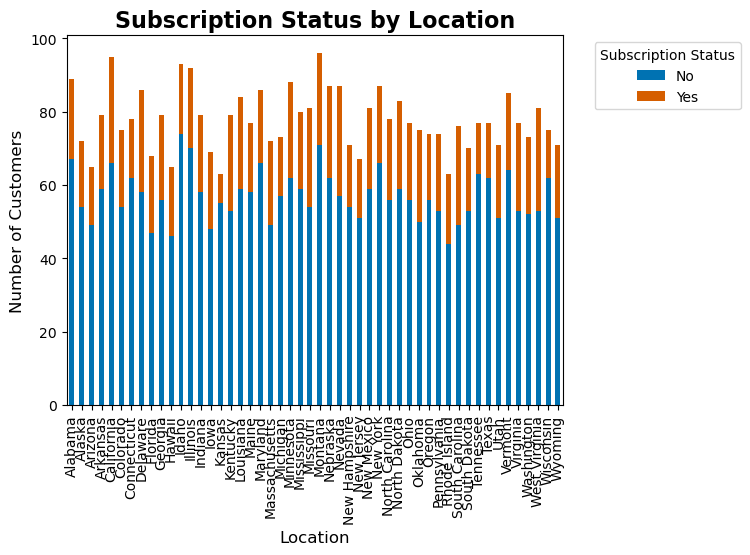

In [ ]:
# Plotting subscription status by location
location_subscription = pd.crosstab(df['Location'], df['Subscription Status'])
plt.figure(figsize=(18, 8))
ax = location_subscription.plot(kind='bar', stacked=True, color=['#0072b2', '#d55e00', '#cc79a7', '#009e73'])
plt.title('Subscription Status by Location', fontsize=16, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Subscription Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1800x800 with 0 Axes>

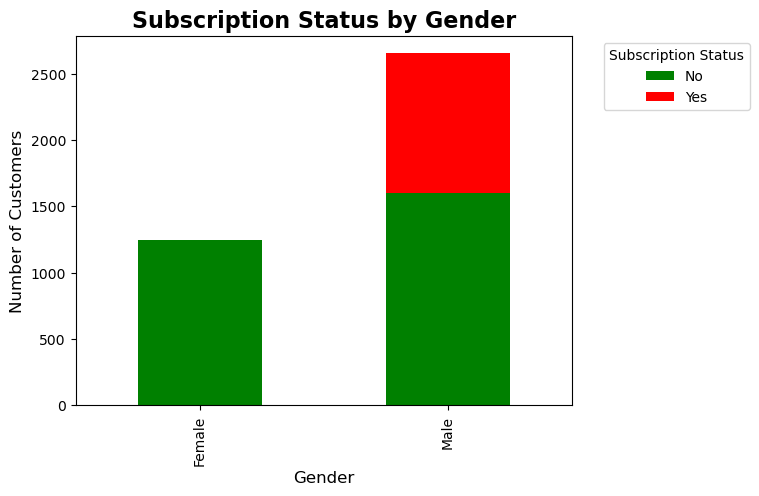

In [10]:
# Plotting subscription status by gender
location_subscription = pd.crosstab(df['Gender'], df['Subscription Status'])
plt.figure(figsize=(18, 8))
ax = location_subscription.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Subscription Status by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Subscription Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [11]:
# Plotting the top 10 most popular colors
top_color = df.groupby('Color')['Purchase Amount (USD)'].mean().sort_values(ascending = True)
top_color = df.groupby('Color')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(top_color.head(10), x = 'Color' , y = 'Purchase Amount (USD)')
fig.show()
